In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

#https://stackoverflow.com/questions/59702230/how-to-correctly-import-a-python-module-in-vs-code
sys.path.append("C:/Users/Leon/Documents/AI_project/AI_project")

from Helper import dataset_prep

In [3]:
vegis_1 = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegis_traindata.csv")
vegis_1 = vegis_1.drop(columns=["Unnamed: 0", "Image"])

vegis_2 = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/TESTDATA_vegis_testdata.csv")
vegis_2 = vegis_2.drop(columns=["Unnamed: 0", "Image"])

display(vegis_1.head())
display(vegis_2.head())

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label
0,174,111,121,98,76,0,0,0.747411,0.740759,39,12.664070,Kartoffel
1,97,65,109,84,50,0,0,0.785250,0.812063,18,7.130874,Kartoffel
2,139,124,144,118,84,0,0,0.826178,0.791622,36,5.622304,Kartoffel
3,90,61,108,80,44,0,0,0.782149,0.816098,14,10.524947,Kartoffel
4,73,50,110,83,46,0,0,0.764247,0.810826,11,6.394969,Kartoffel


,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label
0,174,76,101,71,36,0,0,0.737560,0.641460,24,8.030712,Kartoffel
1,165,94,120,102,78,0,2,0.000000,0.740219,43,6.675791,Kartoffel
2,177,99,107,88,64,0,0,0.730839,0.715150,40,4.414075,Kartoffel
3,161,74,107,88,64,0,0,0.742698,0.670203,25,6.183902,Kartoffel
4,127,87,103,89,72,0,0,0.740022,0.755528,44,6.381831,Kartoffel


In [5]:
total_l = vegis_1.shape[0] + vegis_2.shape[0]
vegis = pd.concat([vegis_1, vegis_2], axis=0).reset_index(drop=True)
assert(total_l == vegis.shape[0])

display(vegis.head())
print(vegis.shape)

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label
0,174,111,121,98,76,0,0,0.747411,0.740759,39,12.664070,Kartoffel
1,97,65,109,84,50,0,0,0.785250,0.812063,18,7.130874,Kartoffel
2,139,124,144,118,84,0,0,0.826178,0.791622,36,5.622304,Kartoffel
3,90,61,108,80,44,0,0,0.782149,0.816098,14,10.524947,Kartoffel
4,73,50,110,83,46,0,0,0.764247,0.810826,11,6.394969,Kartoffel


(2475, 12)


In [4]:
vegis.loc[vegis.duplicated()]

,Hight,Width,R,G,B,green pixels,green onion pixels,ratio area,circularity,keypoints,mean keypoints,Label
74,82,55,105,79,46,0,0,0.836585,0.832467,7,9.235464,Kartoffel
1645,250,99,89,69,36,4939,5713,0.545192,0.297849,197,4.922441,Karotte_Trieb


In [5]:
vegis.dtypes

Hight                   int64
Width                   int64
R                       int64
G                       int64
B                       int64
green pixels            int64
green onion pixels      int64
ratio area            float64
circularity           float64
keypoints               int64
mean keypoints        float64
Label                  object
dtype: object

In [6]:
vegis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hight               2475 non-null   int64  
 1   Width               2475 non-null   int64  
 2   R                   2475 non-null   int64  
 3   G                   2475 non-null   int64  
 4   B                   2475 non-null   int64  
 5   green pixels        2475 non-null   int64  
 6   green onion pixels  2475 non-null   int64  
 7   ratio area          2475 non-null   float64
 8   circularity         2475 non-null   float64
 9   keypoints           2475 non-null   int64  
 10  mean keypoints      2475 non-null   float64
 11  Label               2475 non-null   object 
dtypes: float64(3), int64(8), object(1)
memory usage: 232.2+ KB


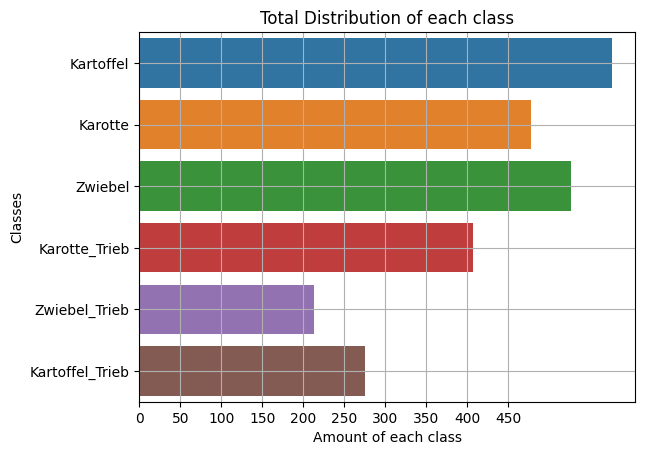

In [7]:
ax = sns.countplot(y=vegis['Label'], data=vegis)
plt.title("Total Distribution of each class")
plt.xlabel("Amount of each class")
plt.ylabel("Classes")
plt.grid()
plt.xticks(np.arange(0,500, step=50))
plt.show()

['Kartoffel' 'Karotte' 'Zwiebel' 'Karotte_Trieb' 'Zwiebel_Trieb'
 'Kartoffel_Trieb']



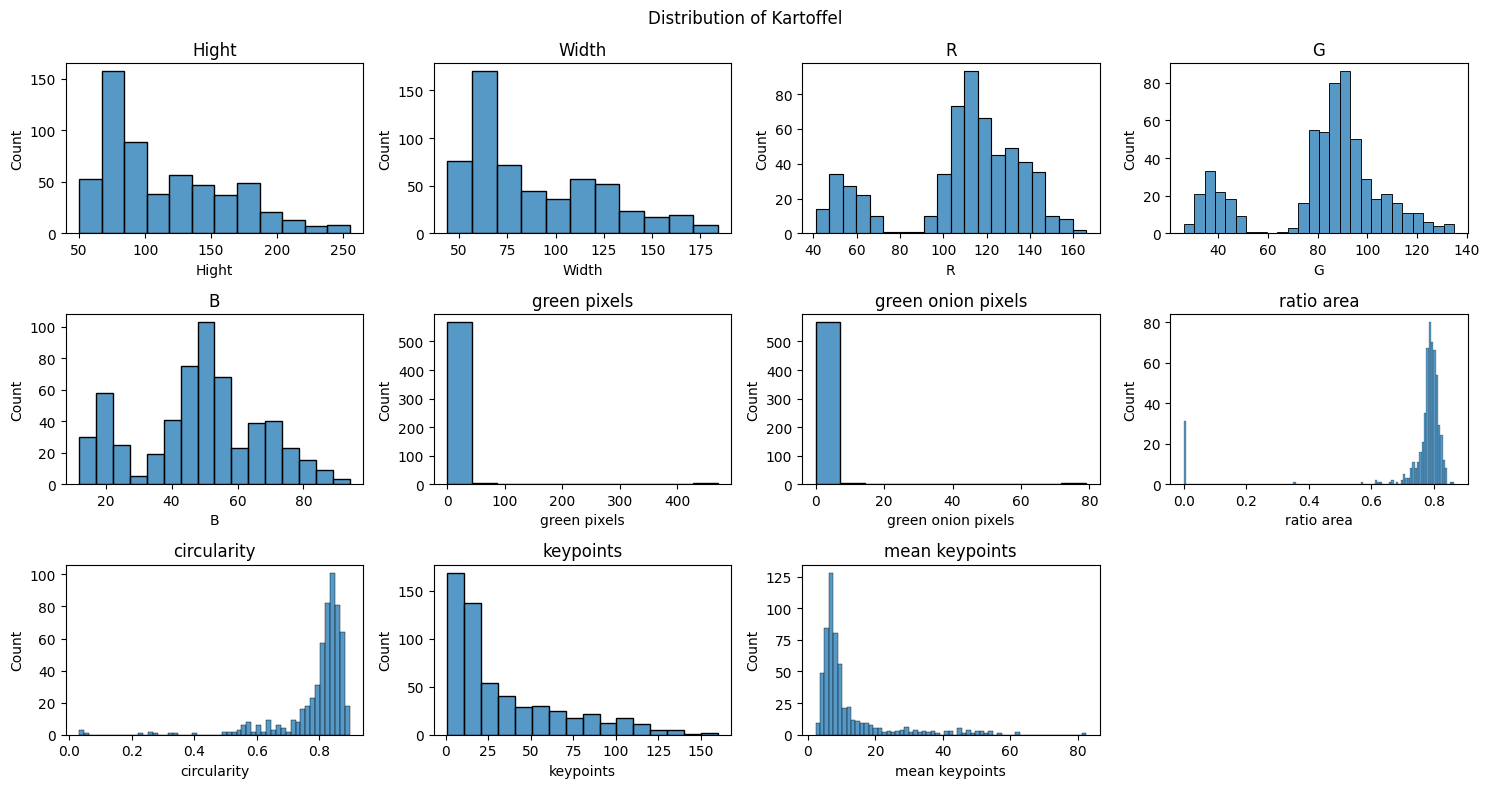

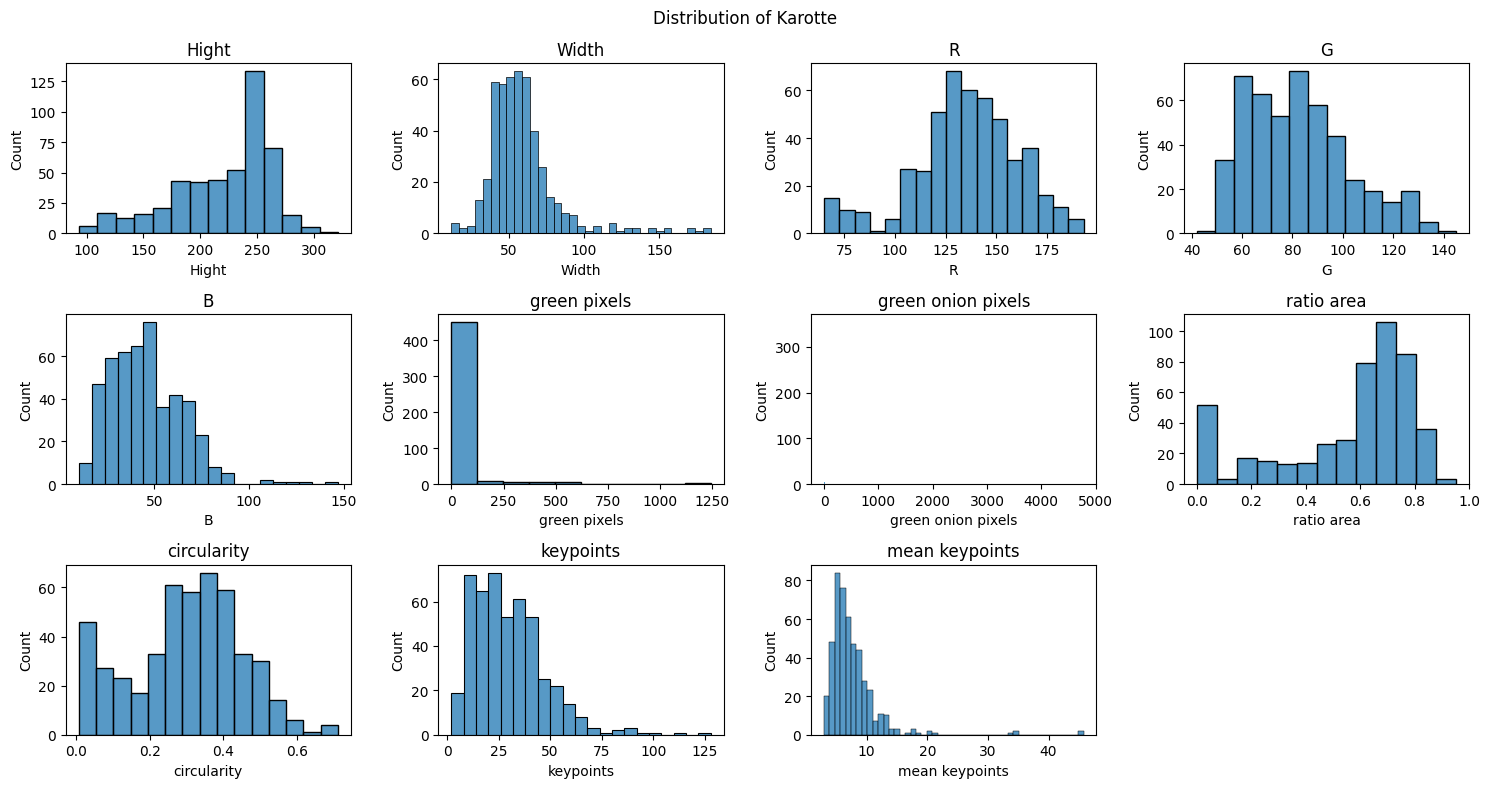

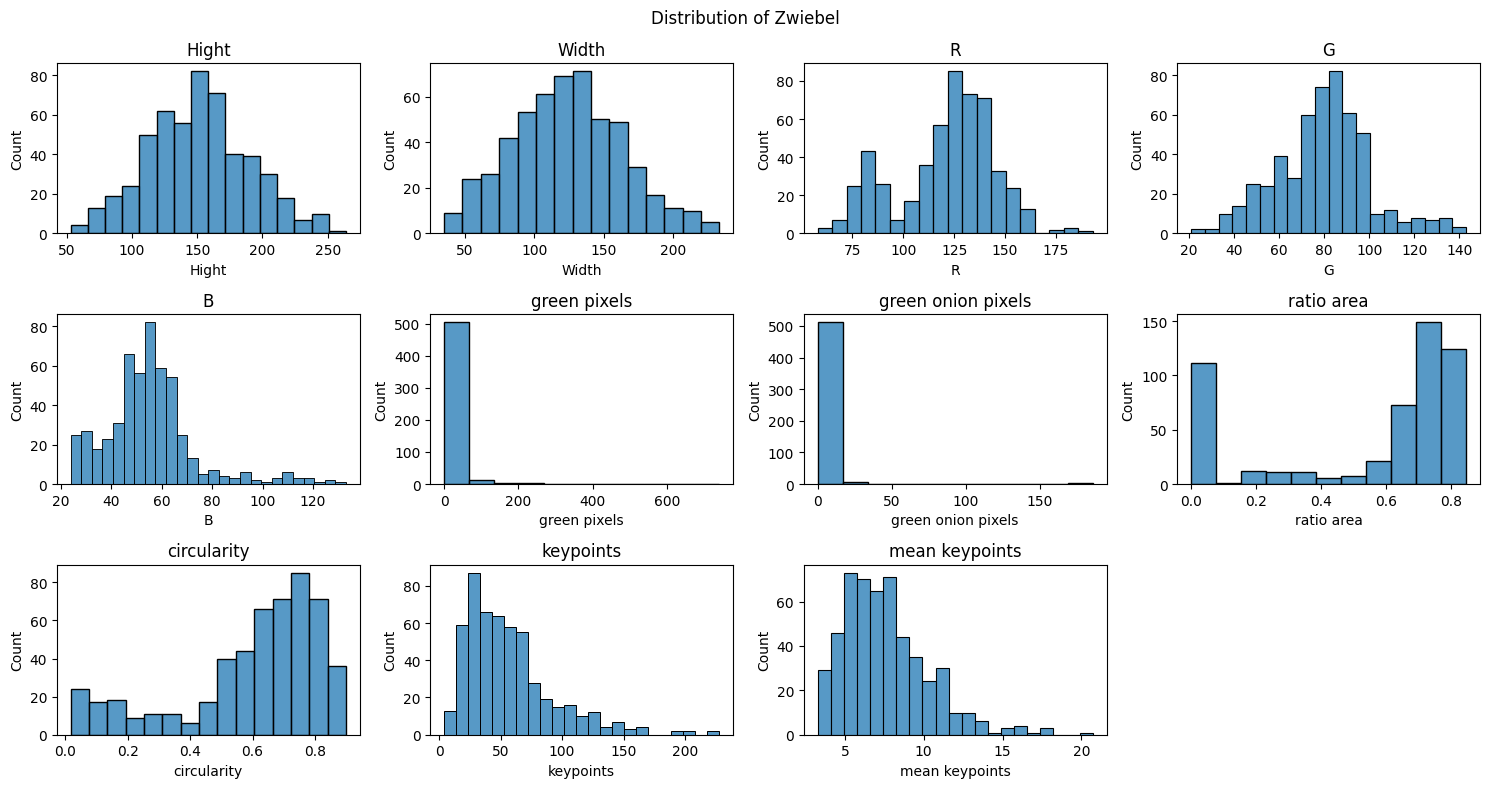

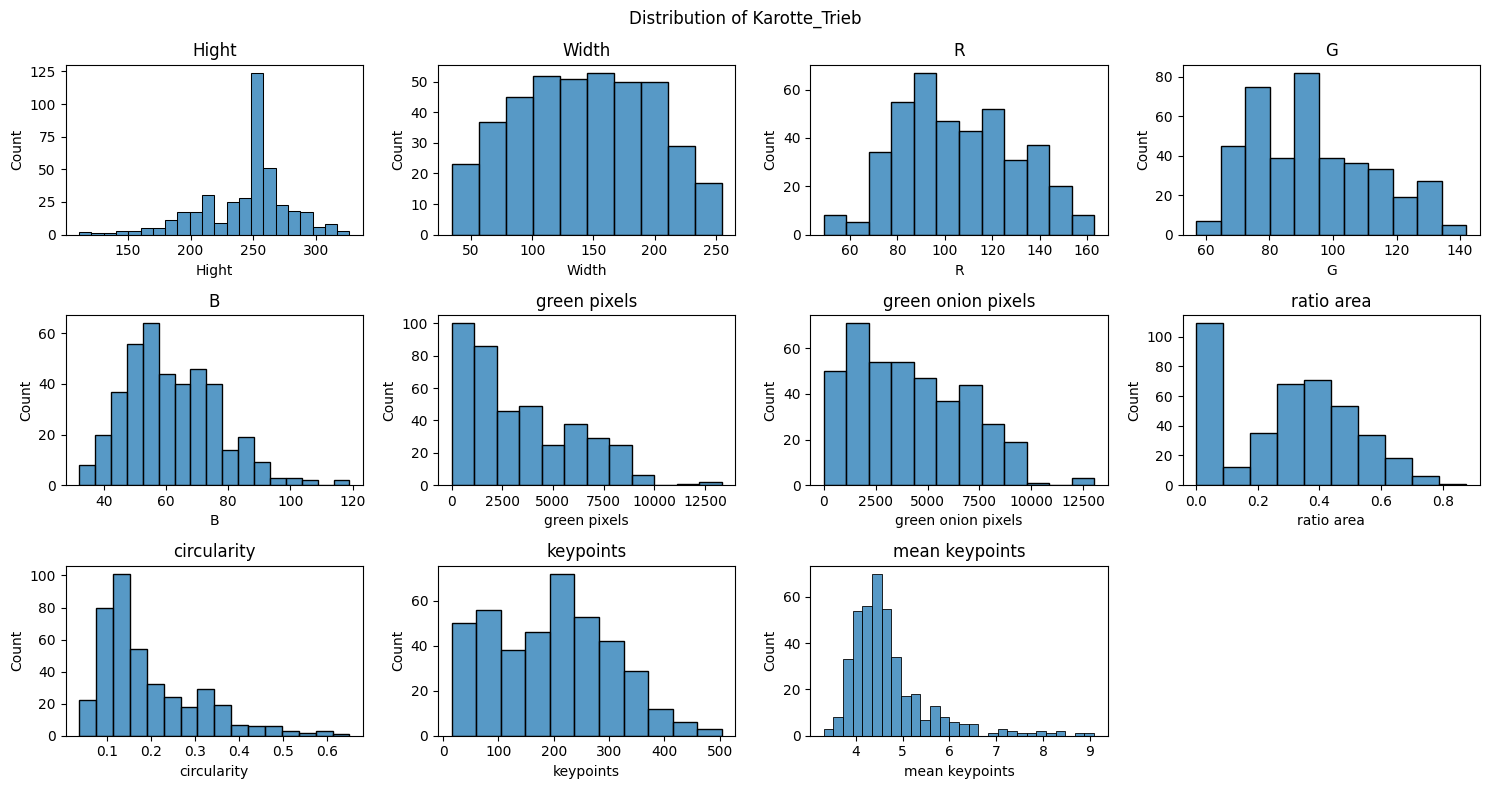

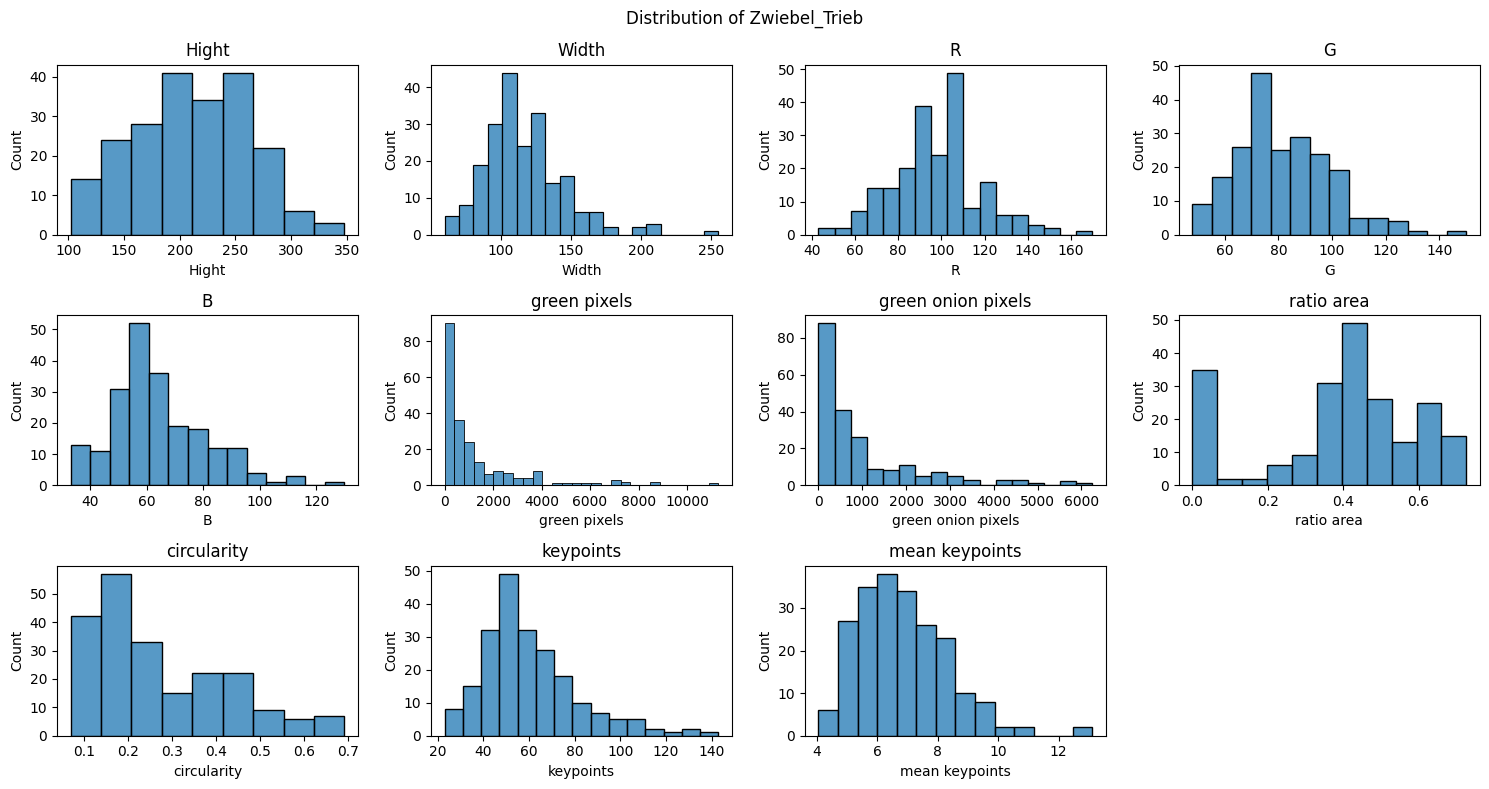

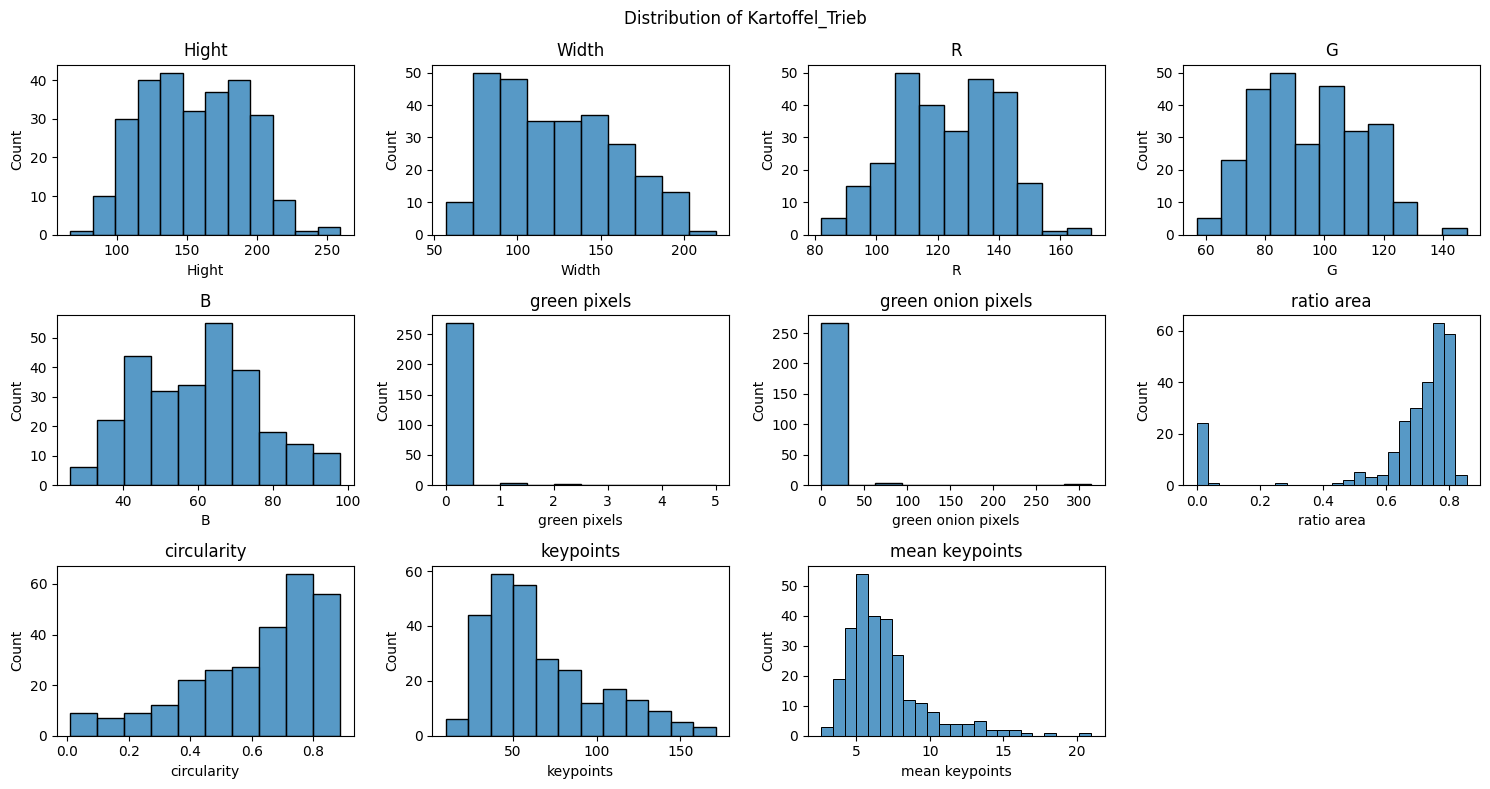

In [8]:
classes = vegis["Label"].unique()
print(classes)
for cls in classes:
    v_df =  vegis.loc[vegis["Label"] == cls]
    v_df = v_df.drop(columns=["Label"])
    print("")

    cols = v_df.columns
    fig, axes = plt.subplots(3, 4, figsize=(15, 8))
    plt.suptitle(f"Distribution of {cls}")
    axes = axes.flatten()
    for i, col in enumerate(cols):
        sns.histplot(v_df[col], ax=axes[i], kde=False)
        axes[i].set_title(col)

    fig.delaxes(axes[11])
    plt.tight_layout()
    plt.show()
    print("\n\n")

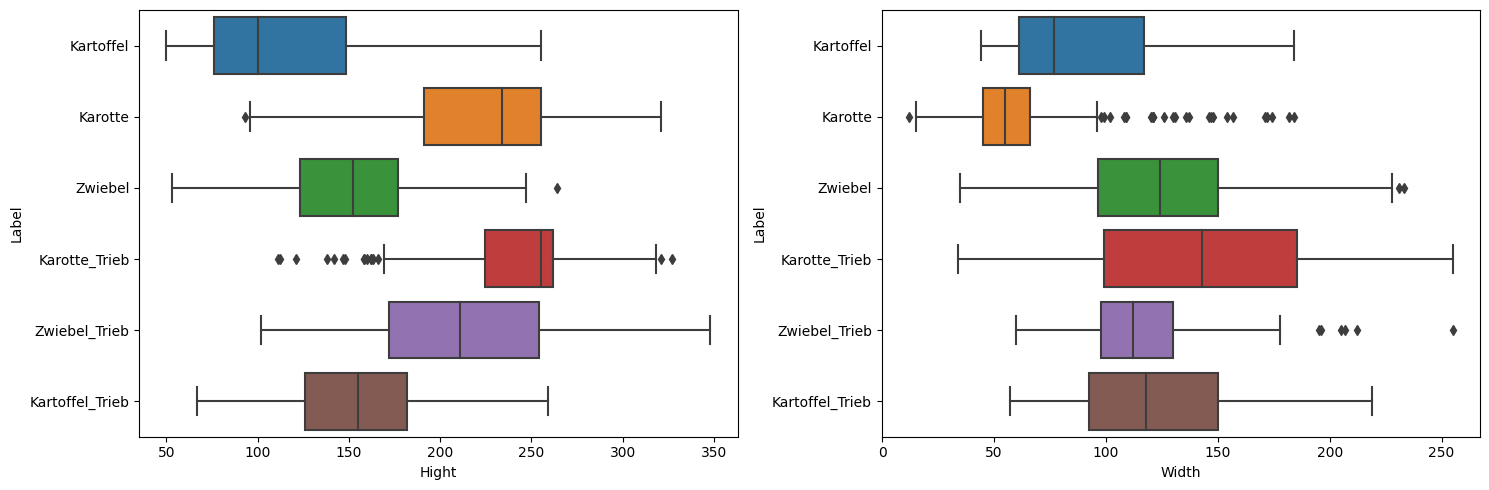

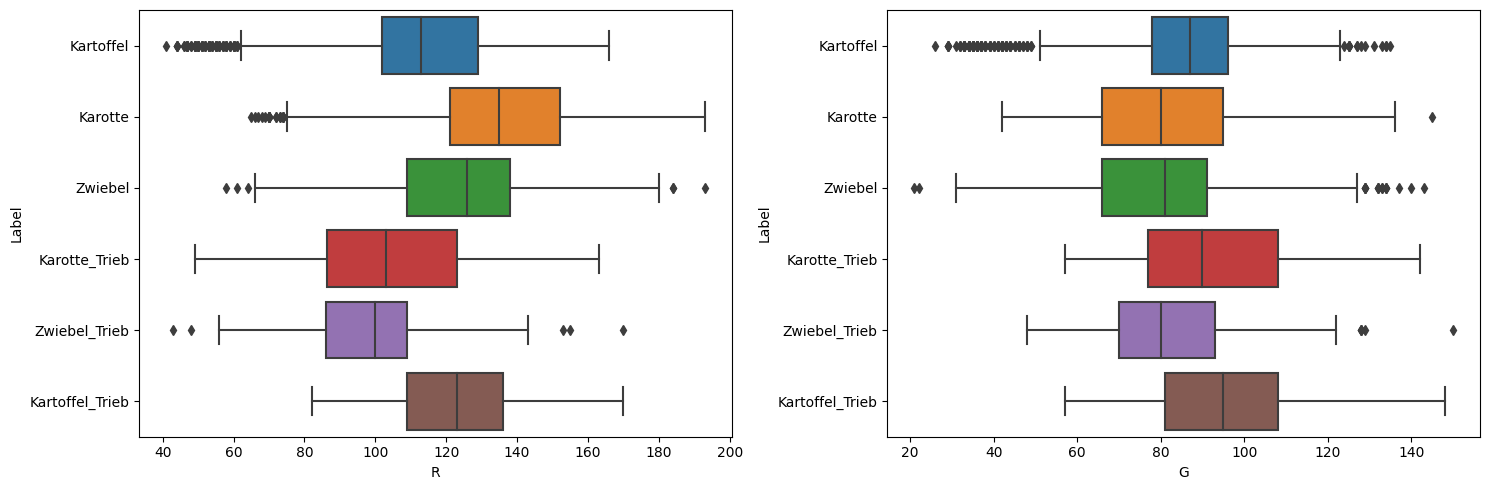

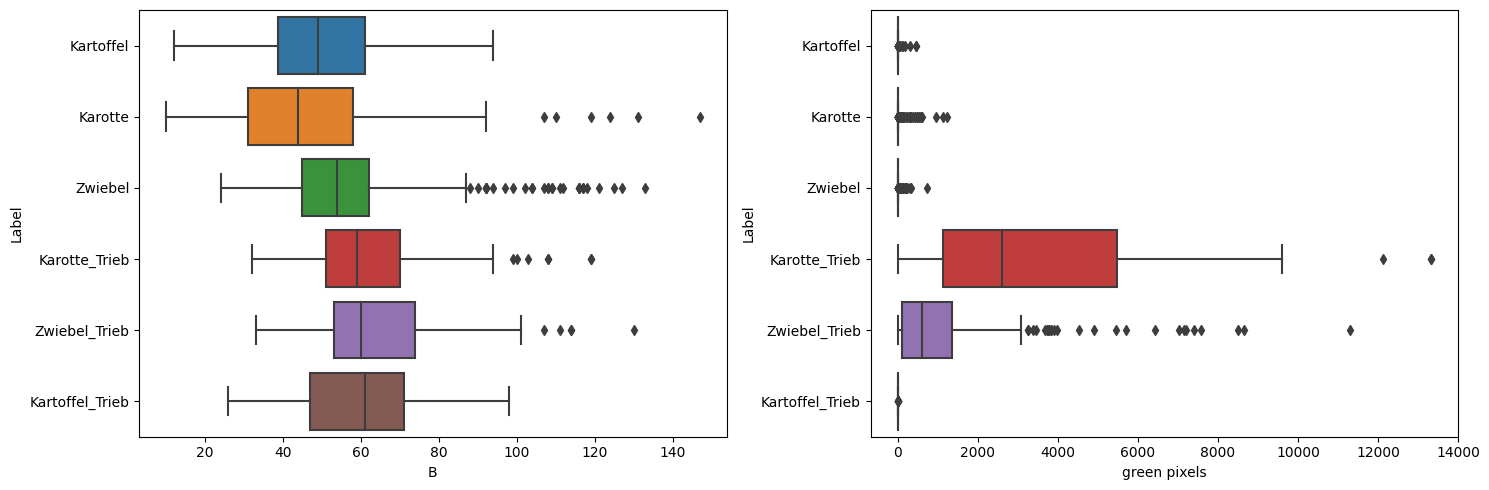

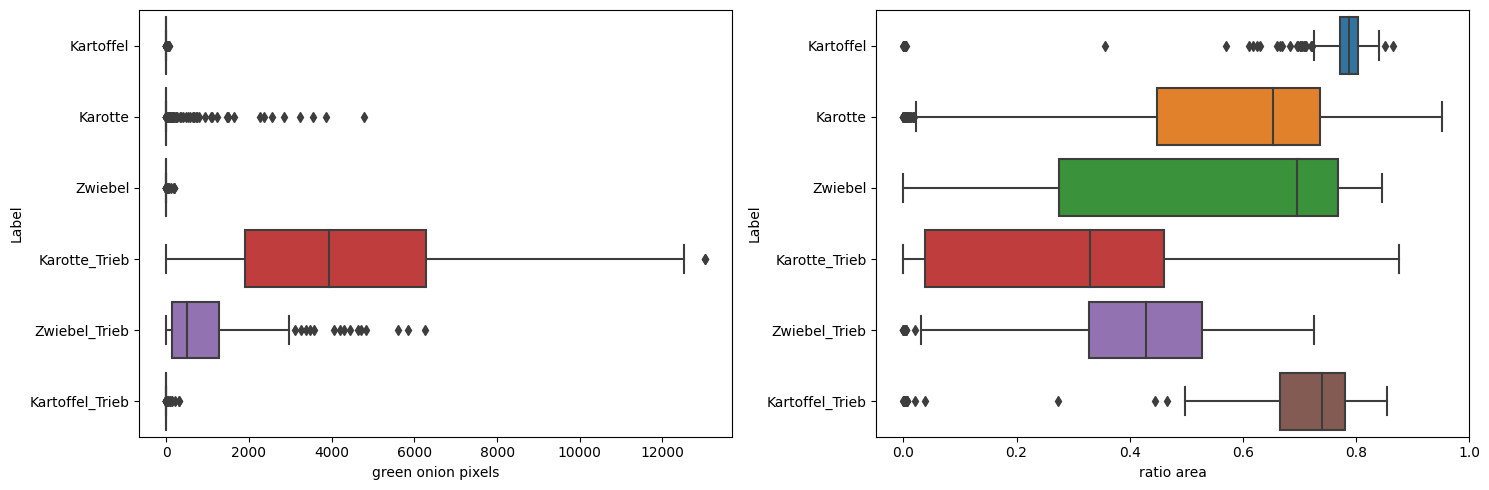

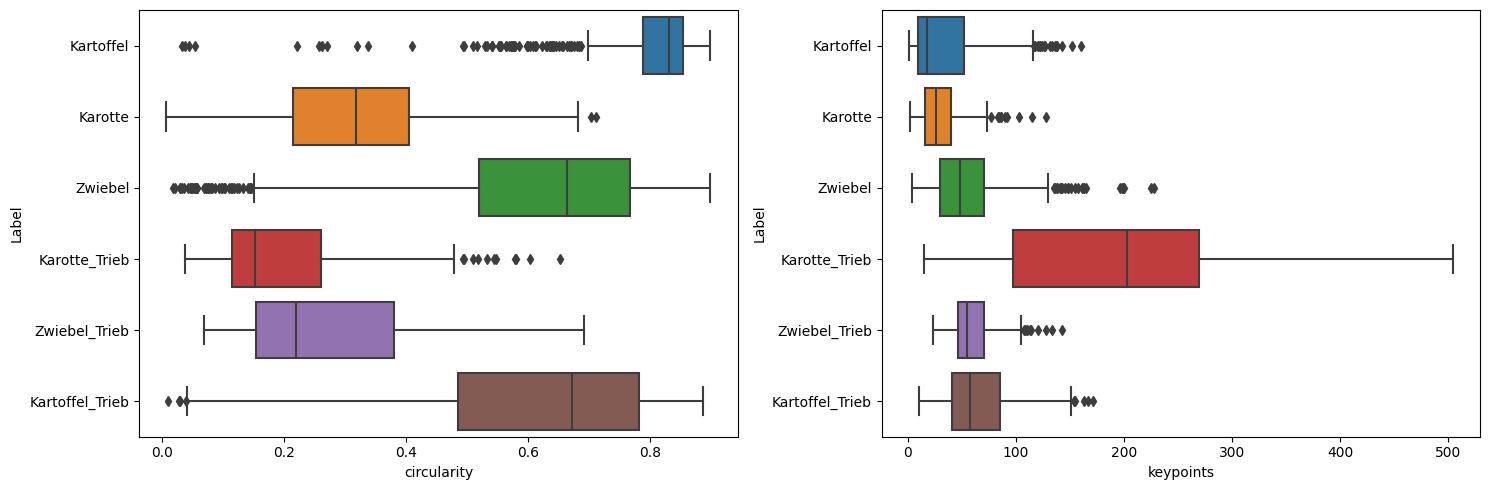

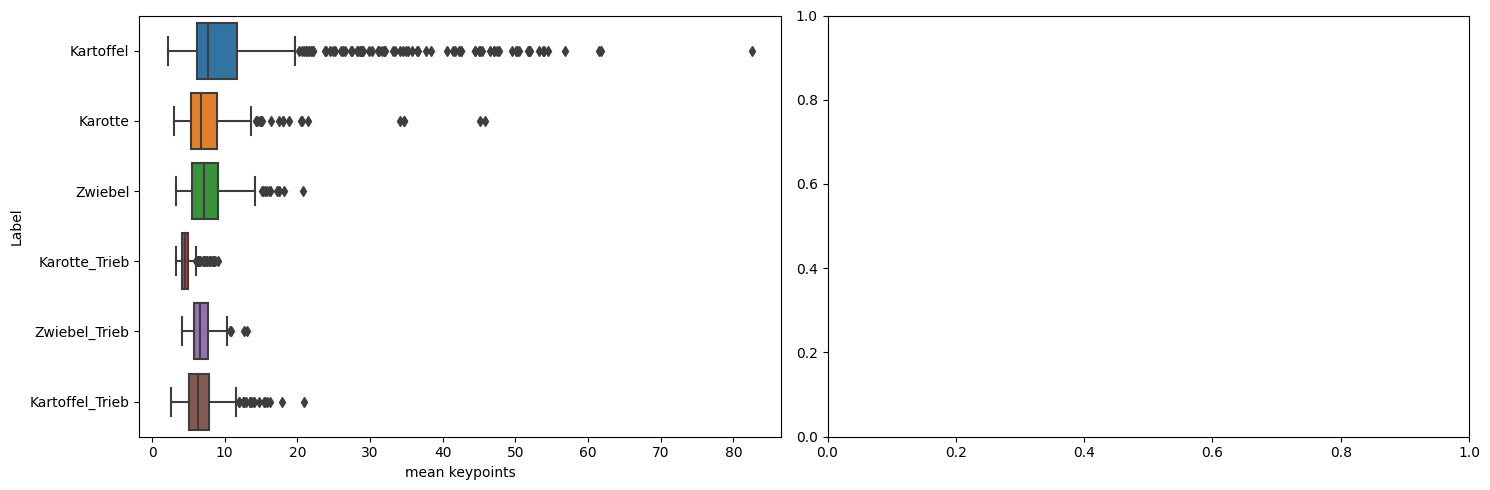

In [21]:
"""
fig, axes = plt.subplots(3, 4, figsize=(17, 10))
plt.suptitle(f"Distribution of each Feature")
axes = axes.flatten()

cols = vegis.columns
for i, col in enumerate(cols):
    if col == "Label":
        continue
    sns.boxplot(data=vegis, x=col, y="Label", ax=axes[i])

fig.delaxes(axes[11])
plt.tight_layout()
plt.show()
"""
cols = list(vegis.columns)
while True:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        if col == "Label":
            continue
        if i == 2:
            break

        sns.boxplot(data=vegis, x=col, y="Label", ax=axes[i])
    _ = cols.pop(0)
    _ = cols.pop(0)

    plt.tight_layout()
    plt.show()

    if len(cols) == 0:
        break
